In [1]:
using Distributions, Plots
default(size=(800,600))

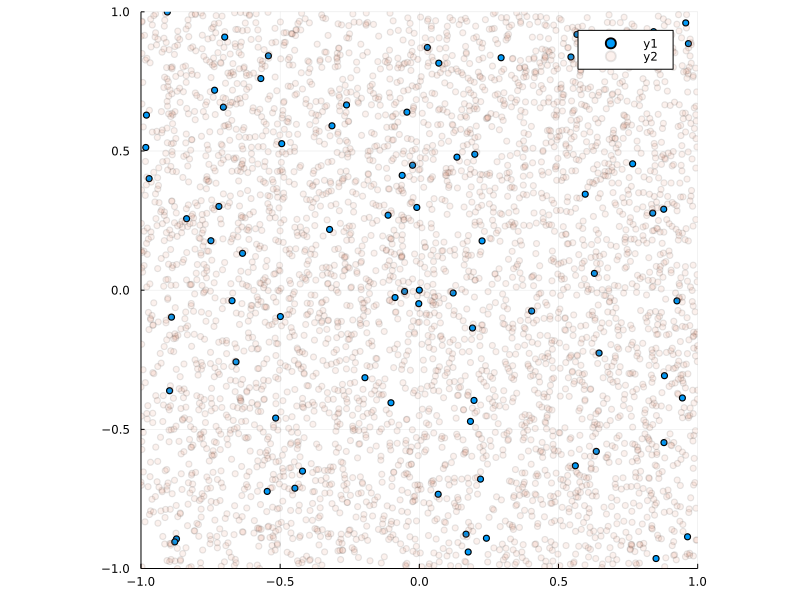

In [2]:
lambda_c=1000.0
lambda_a=20.0

area_a = 4;

Na = rand(Poisson(lambda_a*area_a))

xa = rand(Uniform(-1,1),Na,2)

xa = [0.0 0.0;xa] #Palm conditioning

Nc = rand(Poisson(lambda_c*area_a))
xc = rand(Uniform(-1,1),Nc,2)

scatter(xa[:,1],xa[:,2], xlims=(-1,1), ylims=(-1,1), aspectratio=:equal)
scatter!(xc[:,1], xc[:,2], alpha=0.1)

In [3]:
d(x,y) = sqrt(sum((x-y).^2))
W = [d(xa[i,:],xc[j,:]) for i=1:Na+1,j=1:Nc]

attachs = zeros(Nc)

for j=1:Nc    
    _,idx = findmin(W[:,j])
    attachs[j] = idx
end


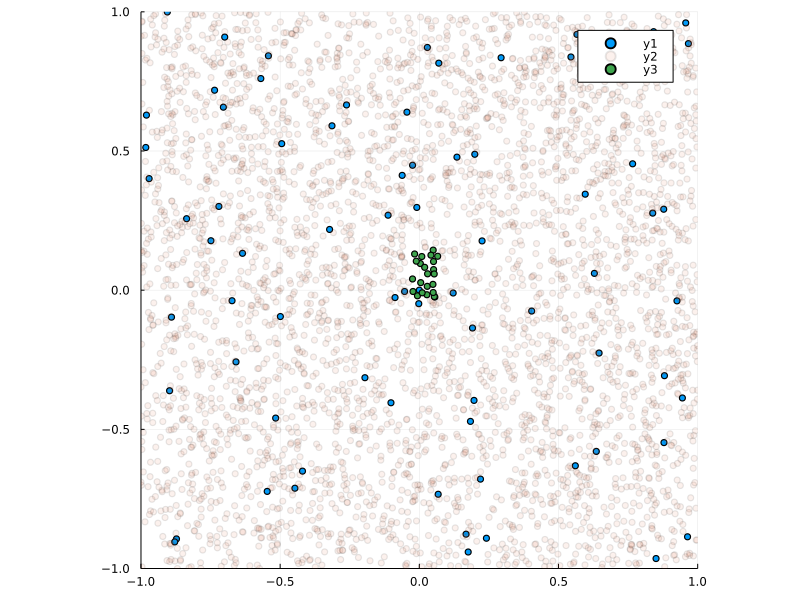

In [4]:
xc0 = xc[attachs.==1.0,:]
scatter(xa[:,1],xa[:,2], xlims=(-1,1), ylims=(-1,1), aspectratio=:equal)
scatter!(xc[:,1], xc[:,2], alpha=0.1)
scatter!(xc0[:,1], xc0[:,2])

In [5]:
function countVoronoi(lambda_a,lambda_c)
    
    area_a = 4;

    Na = rand(Poisson(lambda_a*area_a))

    xa = rand(Uniform(-1,1),Na,2)
    xa = [0.0 0.0;xa] #Palm conditioning

    Nc = rand(Poisson(lambda_c*area_a))
    xc = rand(Uniform(-1,1),Nc,2)
    
    W = [d(xa[i,:],xc[j,:]) for i=1:Na+1,j=1:Nc]

    attachs = zeros(Nc)

    for j=1:Nc    
        _,idx = findmin(W[:,j])
        attachs[j] = idx
    end
    return sum(attachs.==1)
end

countVoronoi (generic function with 1 method)

In [6]:
using ProgressMeter

reps=1000

res = zeros(reps)

@showprogress 1 for i=1:reps
    res[i] = countVoronoi(lambda_a,lambda_c)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:02:14


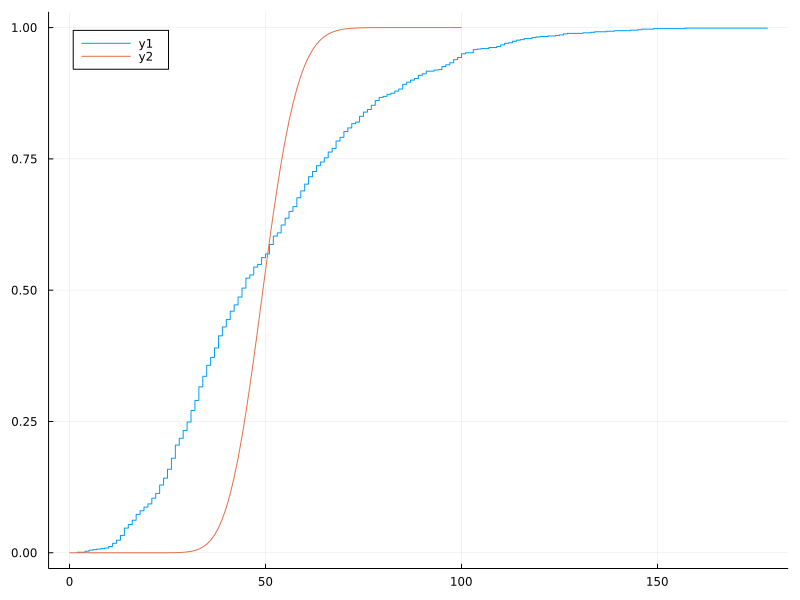

In [7]:
using StatsBase
rho=lambda_c/lambda_a

plot(ecdf(res))
plot!((0:100),cdf(Poisson(rho),(0:100)))

In [8]:
mean(res), var(res)

(50.099, 724.1773763763764)

In [9]:
rho + 2/7*rho^2


764.2857142857142

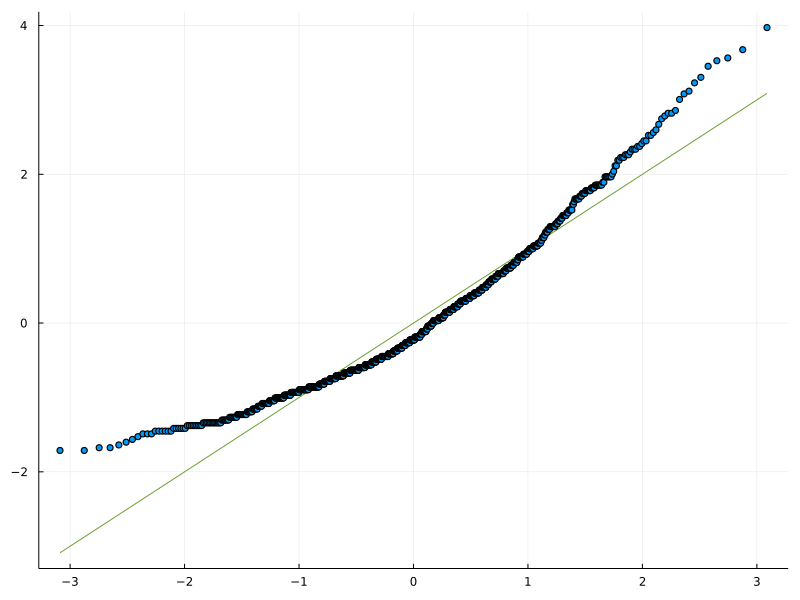

In [10]:
using StatsPlots
z = (res .- mean(res))/sqrt(var(res))

qqnorm(z)